# Random Variables and Distributions
DA Probability & Statistics Learning Series • Lesson 3(?)

<img src="https://ihaveapc.com/wp-content/uploads/2018/03/1-2.jpg" align="center" width="30%"/>

Welcome, again!

*See **#da_prob_stat** for discussion during and after this tutorial.*

A **Random Variable** is a variable whose possible values are numerical outcomes of a random process
<img src="https://www.mathsisfun.com/data/images/random-variable-1.svg" align="center"/>

X really refers to the distribution of possible values and the associated probabilities.
This contrasts to your conventional algebraic variables that typically have a single value

A **discrete random variable** is one which may take on only a countable number of distinct values. For example, rolling a die.

$$
\begin{align}
X &= [{1},{2},{3},{4},{5},{6}]
\end{align}
$$

A discrete random variable must adhere to the following two rules:

$$
1: 0 < P(X=x_i) < 1 \text{ for each i }\\
2: P(X=x_1)+P(X=x_2)+...+P(X=x_k)=1
$$

A **continuous random variable** is one which takes an infinite number of possible values

$$
\begin{align}
Y &= \text{ exact transit time of a shipment }
\end{align}
$$

In [111]:
# Import dependencies 
from custom.db_utils import get_connection
import pandas as pd

#Stats
import scipy.stats
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Get the database connection and cursor objects
conn, cur = get_connection()

# Use a context manager to open and close connection and files
with conn:
    
    # Open the query.sql file
    with open('invoicing_otp.sql', 'r') as q:

        # Save contents of query.sql as string
        query_str = q.read()
    
    # Use the read_sql method to get the data from Snowflake into a 
    # Pandas dataframe
    df = pd.read_sql(query_str, conn)
    
    # Make all the columns lowercase
    df.columns = map(str.lower, df.columns)

# Preview the data
df.sample(3)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


,invoice_id,invoice_shared_at,share_due_at,is_invoiced_on_time,days_to_share
27431,831342,2020-07-20 22:16:58.494396,2020-07-21 11:00:00+00:00,True,-0.5299
14518,854785,2020-07-15 14:07:07.739903,2020-07-23 19:00:00+00:00,True,-8.2034
30633,806519,2020-07-20 13:33:47.816275,2020-07-20 10:00:00+00:00,False,0.1485


**TODO**: 

Based on the dataframe, define 2 random variables: one discrete and one continuous

**Discrete Random Variable**
$$
x=\left\{\begin{matrix}
1\text{ on-time}\\
0\text{ late}\;\;\;\;\;
\end{matrix}\right.
$$

**Continuous Random Variable**
$$
Y=\text{time to share}
$$

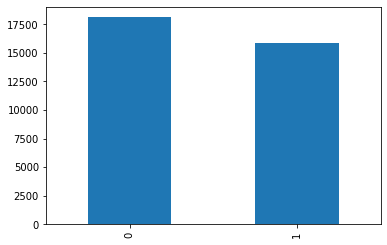

In [21]:
#Now lets plot the distributions of the discrete random variable
df['is_invoiced_on_time'].astype(int).value_counts().plot(kind="bar")

<img src="https://miro.medium.com/max/700/1*nOMS0KgevT7YfqtfnhgXUg.png" align="center"/>

## Discrete Probability Distributions

Probability Mass Function (PMF): calculates the probability of observing a given value

Cumulative Density Function (CDF): calculates the probability of an observation equal or less than a value

**Binomial Distribution:** the number of success in a sequence of independent experiments

1. The number of observations n is fixed.
2. Each observation is independent.
3. Each observation represents one of two outcomes ("success" or "failure").
4. The probability of "success" p is the same for each outcome.

**PMF:** 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/20edfc22372742d64909cf7c7f97593bade88338" align="center"/>

**CDF:** 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/fd1025340253c089ca86464487c3e00101141ba5" align="center"/>


For a single trial, i.e., n = 1, the binomial distribution is a **Bernoulli distribution**

## Poisson distribution:
 - The Poisson distribution can be used to calculate the probabilities of various numbers of "successes" based on the mean number of successes

**PDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/75b15a85051528f8722d2b676a557f6c22bf85c4" align="left "/>
**CDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/016f49082c09ba307c9cb2a51039134a4c35cca2" align="right "/>


(array([6.710e+02, 4.002e+03, 2.482e+04, 3.385e+03, 6.270e+02, 1.900e+02,
        8.000e+01, 4.000e+01, 4.200e+01, 2.800e+01, 1.500e+01, 6.000e+00,
        8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00]),
 array([-55.307   , -30.878565,  -6.45013 ,  17.978305,  42.40674 ,
         66.835175,  91.26361 , 115.692045, 140.12048 , 164.548915,
        188.97735 , 213.405785, 237.83422 , 262.262655, 286.69109 ,
        311.119525, 335.54796 , 359.976395, 384.40483 , 408.833265,
        433.2617  ]),
 <a list of 20 Patch objects>)

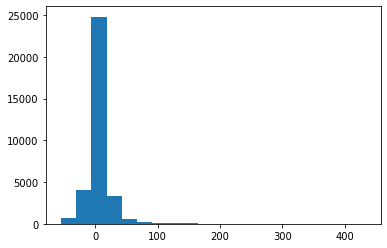

In [115]:
share_times = df['days_to_share'].tolist()
plt.hist(share_times, bins=20)

## Continuous Probability Distributions

**Probability Density Function (PDF):** calculates the probability of observing a given value

**Cumulative Density Function (CDF):** calculates the probability of an observation equal or less than a value

The **CDF** is the integral of the **PDF** from  −∞ to 𝑥

A **Gaussian (normal)** distribution: 
 - widely used in data science
 - represents many phenomena in the world
 - and the sum of small random variables also turns out to usually follow a normal distribution (Central Limit Theorem)

**PDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40" align="left "/>
**CDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea" align="right "/>


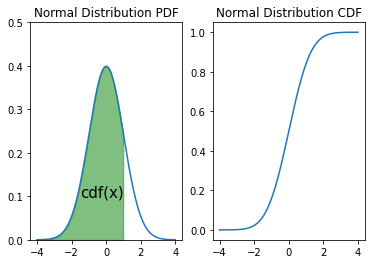

In [110]:
#Let's take a step back and visualize the relationship between the PDF and CDF

fig, (ax1, ax2) = plt.subplots(1,2)
x= np.arange(-4,4,0.001)
ax1.plot(x, norm.pdf(x))
px=np.arange(-4,1,0.01)
ax1.set_ylim(0,0.5)
ax1.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax1.set_title('Normal Distribution PDF')
# for text
ax1.text(-1.5,0.1,"cdf(x)", fontsize=15)
ax2.plot(x, norm.cdf(x))
ax2.set_title('Normal Distribution CDF')
plt.show()

Text(0.5, 1.0, 'Normal Distribution CDF')

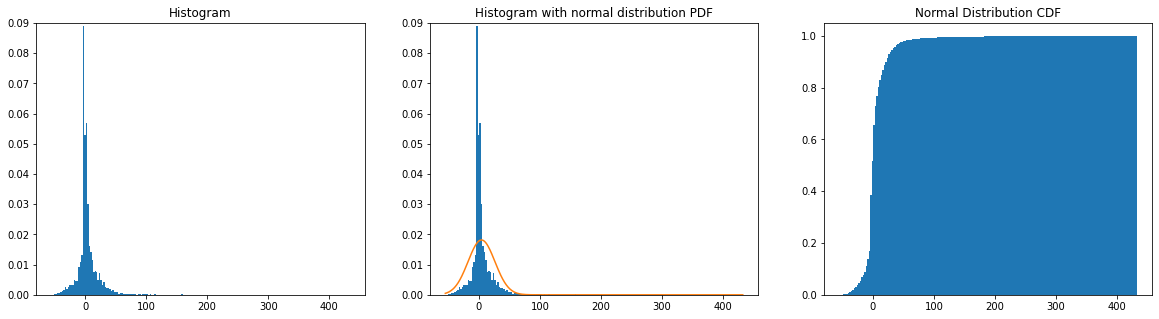

In [95]:
#now lets try to see how well our invoicing OTP data fits a normal distribution 
mean = np.mean(share_times)
std = np.std(share_times)

distribution = norm(mean, std)

min_time = min(share_times)
max_time = max(share_times)
values = list(range(int(min_time), int(max_time)))
probabilities = [distribution.pdf(v) for v in values]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.hist(share_times, bins=200, density=True)
ax1.set_title('Histogram')
ax1.set_ylim(0,0.09)

ax2.hist(share_times, bins=200, density=True)
ax2.plot(values, probabilities)
ax2.set_title('Histogram with Normal Distribution PDF')
ax2.set_ylim(0,0.09)

ax3.hist(share_times, cumulative=True, density=1, bins=200)
ax3.set_title('Normal Distribution CDF')

**Homework:**
Take the same data in `invoicing_otp.sql` and find the distribution that best fits the following:



KeyboardInterrupt: 

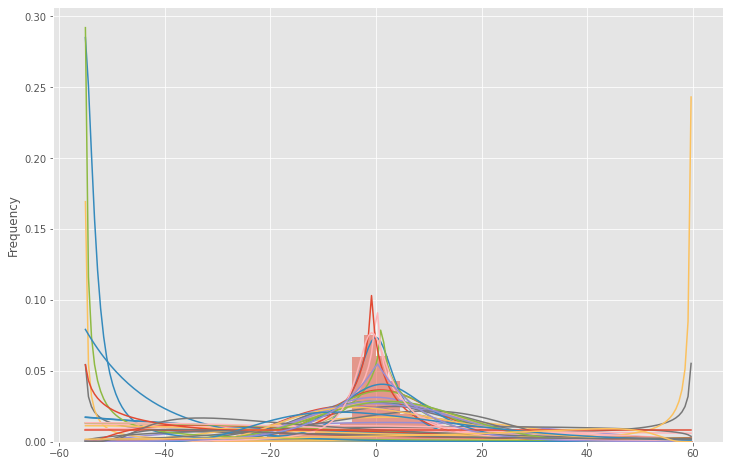

In [69]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(df['days_to_share'].values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find b`est fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
